<a href="https://colab.research.google.com/github/Seng-Pan/atomproject/blob/main/ASL_yolov8detection_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install comet-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [5]:
# necessary labraries

from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import comet_ml
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')
comet_ml.init()

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Mounted at /content/drive
Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


[['25', '0.541246', '0.645202', '0.356061', '0.664141']]
[['4', '0.570286', '0.598485', '0.808081', '0.762626']]
[['22', '0.409933', '0.654040', '0.325758', '0.419192']]
[['2', '0.482639', '0.449495', '0.481061', '0.565657']]
[['16', '0.600589', '0.750000', '0.333333', '0.419192']]
[['2', '0.446654', '0.472222', '0.526515', '0.616162']]
[['14', '0.373316', '0.638889', '0.434343', '0.479798']]
[['20', '0.493266', '0.684343', '0.320707', '0.333333']]
[['16', '0.553872', '0.693182', '0.300505', '0.396465']]
[['0', '0.562710', '0.496212', '0.439394', '0.426768']]
[['0', '0.204230', '0.296717', '0.318182', '0.477273']]
[['0', '0.615741', '0.595960', '0.474747', '0.434343']]
[['1', '0.517256', '0.587121', '0.474747', '0.820707']]
[['1', '0.489478', '0.654040', '0.343434', '0.590909']]
[['1', '0.508417', '0.672980', '0.300505', '0.568182']]
[['2', '0.459912', '0.516414', '0.344697', '0.371212']]
[['2', '0.455177', '0.535354', '0.376894', '0.474747']]
[['2', '0.433396', '0.502525', '0.401515',

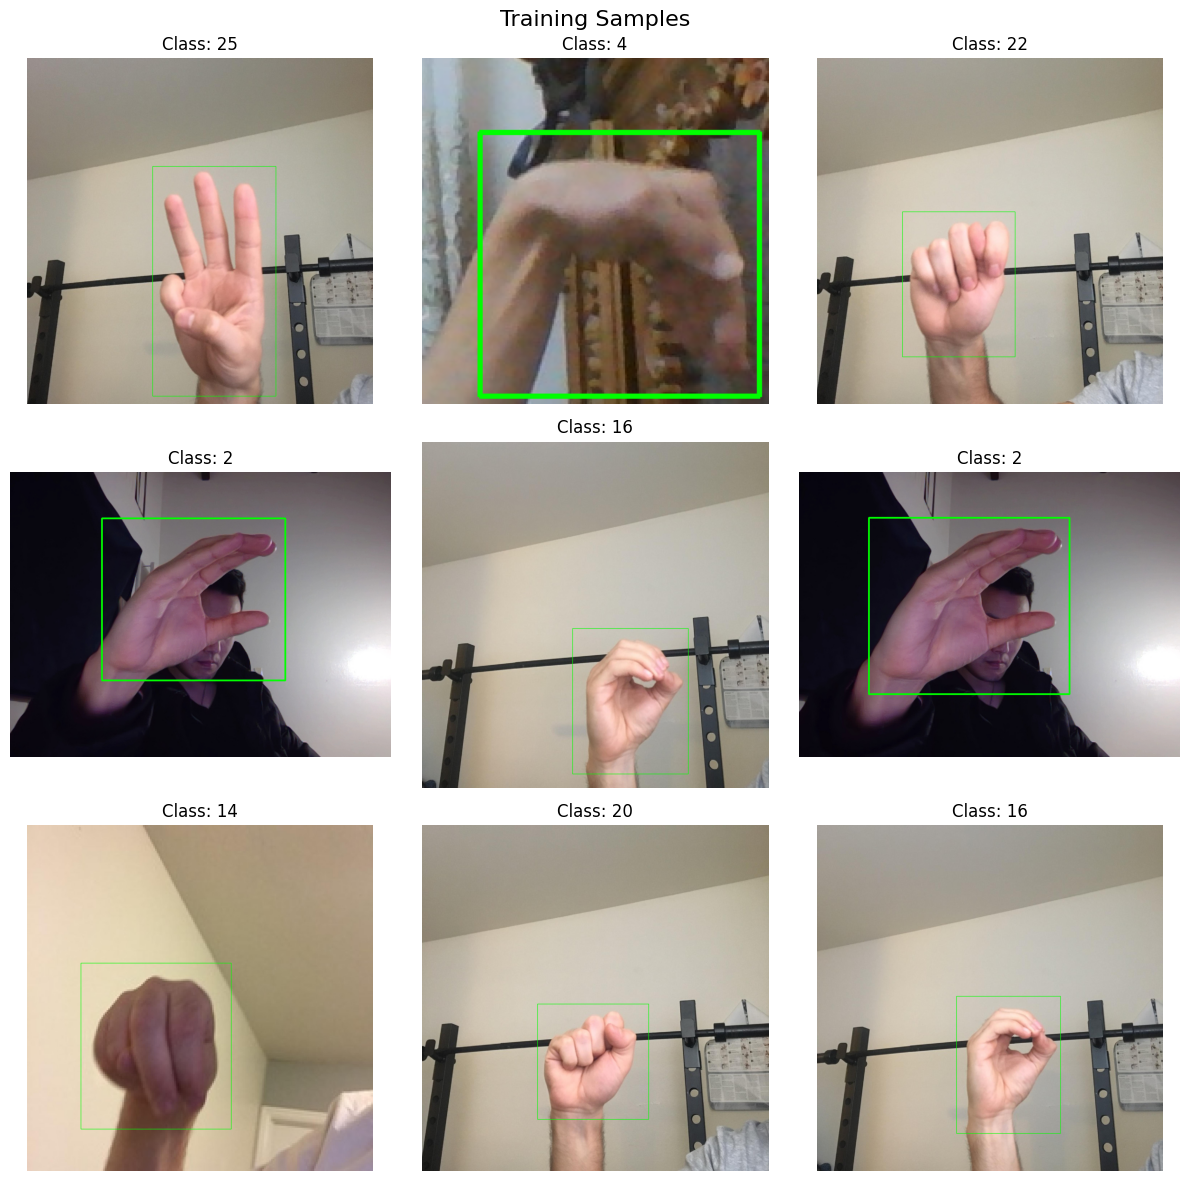

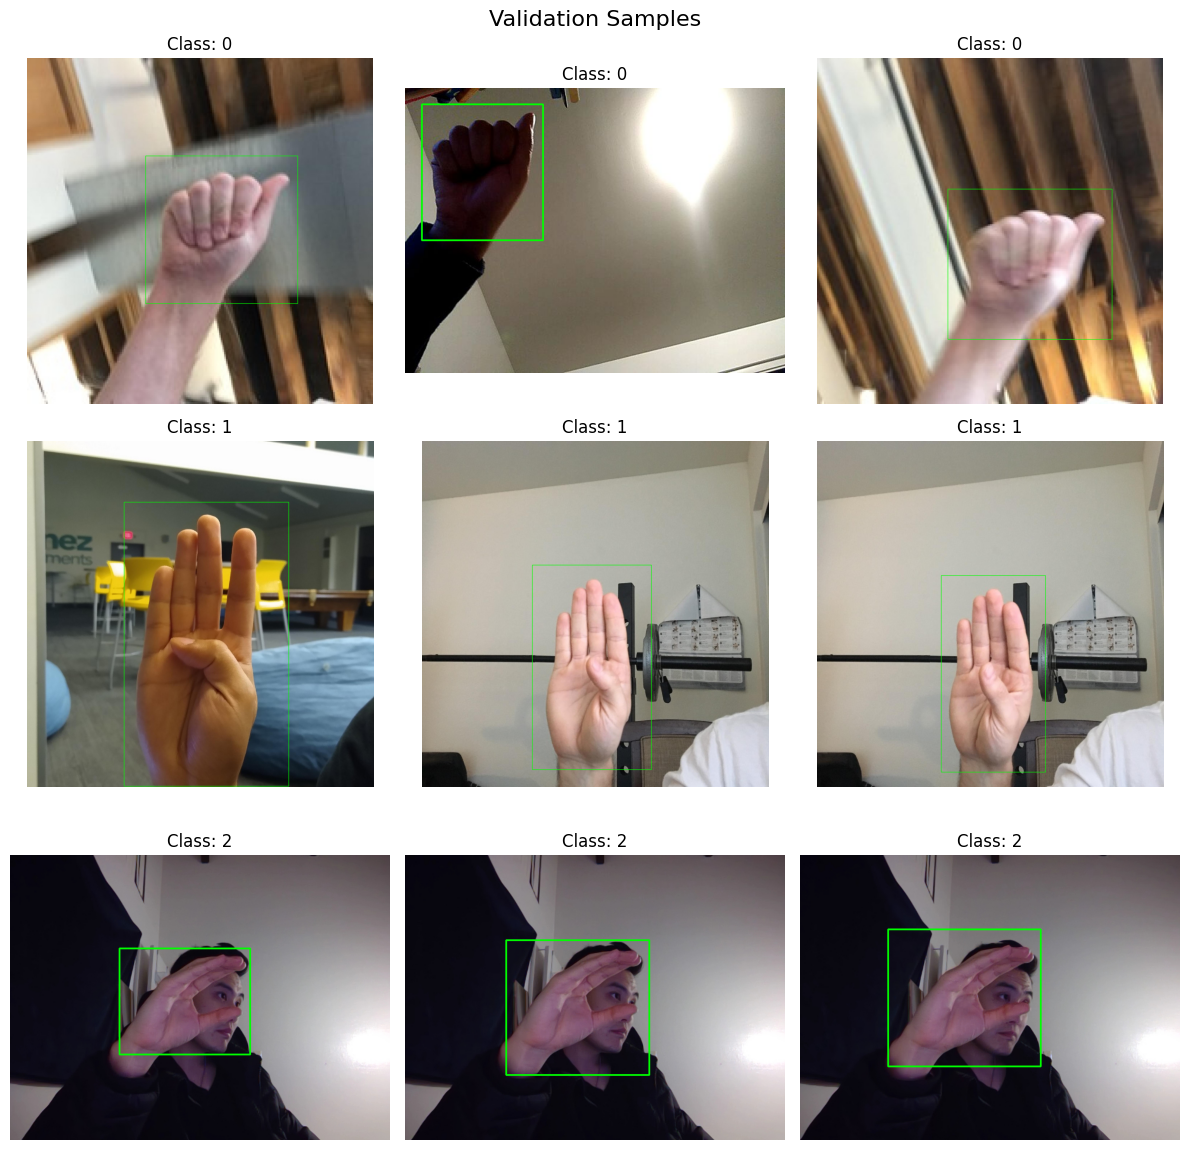

In [6]:
data_dir = '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/'

train_Train_path = os.path.join(data_dir, 'Train/images/train')
val_Train_path = os.path.join(data_dir, 'Train/images/val')

train_data = []
for root, _, files in os.walk(train_Train_path):
    for file in files:
        if file.lower().endswith('.jpg'):
            train_data.append(os.path.join(root, file))

val_data = []
for root, _, files in os.walk(val_Train_path):
    for file in files:
        if file.lower().endswith('.jpg'):
            val_data.append(os.path.join(root, file))

# print(train_data)
# print(val_data)

random.shuffle(train_data)

def read_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        labels = [line.strip().split() for line in lines]
        return labels

def draw_boxes(image, labels):
    for label in labels:
        class_id = int(label[0])
        x, y, w, h = map(float, label[1:])
        img_height, img_width, _ = image.shape
        x1 = int((x - w / 2) * img_width)
        y1 = int((y - h / 2) * img_height)
        x2 = int((x + w / 2) * img_width)
        y2 = int((y + h / 2) * img_height)
        color = (0, 255, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

def plot_samples(data, title, label_type):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)

    displayed = 0
    for ax, img_path in zip(axes.ravel(), data):

        relative_path = os.path.relpath(img_path, start=train_Train_path if label_type == 'train' else val_Train_path)
        label_path = os.path.join(data_dir, f'Train/Labels/{label_type}', os.path.splitext(relative_path)[0] + '.txt')


        if not os.path.exists(label_path):
            print(f"[Warning] Label file not found: {label_path}")
            continue

        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        labels = read_labels(label_path)
        print(labels)

        image_with_boxes = draw_boxes(image_rgb, labels)

        ax.imshow(image_with_boxes)
        ax.set_title(f"Class: {labels[0][0]}")
        ax.axis('off')
        displayed += 1

        if displayed >= 9:
            break

    plt.tight_layout()
    return fig

# Plot samples
plot_samples(train_data, "Training Samples", label_type='train')
plot_samples(val_data, "Validation Samples", label_type='val')
plt.show()

In [31]:
# import os
# import shutil
# from glob import glob

# def flatten_yolo_structure(data_dir):
#     for split in ['train', 'val']:
#         img_src = os.path.join(data_dir, f'Train/images/{split}')
#         lbl_src = os.path.join(data_dir, f'Train/Labels/{split}')
#         img_dst = os.path.join(data_dir, f'Train/images_flat/{split}')
#         lbl_dst = os.path.join(data_dir, f'Train/Labels_flat/{split}')

#         os.makedirs(img_dst, exist_ok=True)
#         os.makedirs(lbl_dst, exist_ok=True)

#         for img_path in glob(os.path.join(img_src, '*/*.jpg')):
#             fname = os.path.basename(img_path)
#             shutil.copy2(img_path, os.path.join(img_dst, fname))

#         for lbl_path in glob(os.path.join(lbl_src, '*/*.txt')):
#             fname = os.path.basename(lbl_path)
#             shutil.copy2(lbl_path, os.path.join(lbl_dst, fname))

# # Call it
# flatten_yolo_structure(data_dir)



import os
import shutil
import glob

def prepare_yolov8_dataset(data_dir):
    splits = ['train', 'val']
    for split in splits:
        # Input directories
        img_input_dir = os.path.join(data_dir, f'images/{split}')
        lbl_input_dir = os.path.join(data_dir, f'Labels/{split}')

        # Output (flattened) directories
        img_output_dir = os.path.join(data_dir, f'YOLO/images/{split}')
        lbl_output_dir = os.path.join(data_dir, f'YOLO/labels/{split}')

        # Clear or create output folders
        for folder in [img_output_dir, lbl_output_dir]:
            if os.path.exists(folder):
                shutil.rmtree(folder)
            os.makedirs(folder)

        # Get all image paths
        image_paths = glob.glob(os.path.join(img_input_dir, '*', '*.jpg'))

        for img_path in image_paths:
            class_name = os.path.basename(os.path.dirname(img_path))
            filename = os.path.basename(img_path)
            new_name = f"{class_name}_{filename}"

            # Paths
            new_img_path = os.path.join(img_output_dir, new_name)
            label_file = os.path.splitext(filename)[0] + '.txt'
            label_path = os.path.join(lbl_input_dir, class_name, label_file)
            new_label_path = os.path.join(lbl_output_dir, os.path.splitext(new_name)[0] + '.txt')

            # Copy image
            shutil.copy2(img_path, new_img_path)

            # Copy label if exists
            if os.path.exists(label_path):
                shutil.copy2(label_path, new_label_path)
            else:
                print(f"⚠️ Missing label for: {img_path}")

# USAGE
data_dir = '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train'
prepare_yolov8_dataset(data_dir)

In [32]:
data_yaml = f"""
path: {data_dir}
train: /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/images/train
val: /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/images/val
test: Test

nc: 29
names: [ 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q',
 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
"""

with open(os.path.join(data_dir, 'asl.yaml'), 'w') as f:
    f.write(data_yaml)


In [33]:
import torch

# Check if GPU is available
def check_gpu():
    use_gpu = torch.cuda.is_available()
    unit = "cpu"

    if use_gpu:
        print("-------GPU Mode--------")
        unit = "cuda"
    else:
        print("-------CPU Mode--------")

    device = torch.device(unit)
    return device

device = check_gpu()

-------GPU Mode--------


In [34]:
from ultralytics.data.utils import check_det_dataset
check_det_dataset(os.path.join(data_dir, 'asl.yaml'))

{'path': PosixPath('/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train'),
 'train': '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/images/train',
 'val': '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/images/val',
 'test': '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/Test',
 'nc': 29,
 'names': {0: 'A',
  1: 'B',
  2: 'C',
  3: 'D',
  4: 'del',
  5: 'E',
  6: 'F',
  7: 'G',
  8: 'H',
  9: 'I',
  10: 'J',
  11: 'K',
  12: 'L',
  13: 'M',
  14: 'N',
  15: 'nothing',
  16: 'O',
  17: 'P',
  18: 'Q',
  19: 'R',
  20: 'S',
  21: 'Space',
  22: 'T',
  23: 'U',
  24: 'V',
  25: 'W',
  26: 'X',
  27: 'Y',
  28: 'Z'},
 'yaml_file': '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/asl.yaml'}

In [35]:
from ultralytics.engine.model import Model
from ultralytics.models.yolo.detect import DetectionValidator

class CustomValidator(DetectionValidator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def _do_eval(self, stats):
        # Check for empty stats
        if not all(len(v) > 0 for v in stats.values()):
            raise ValueError("Empty validation metrics detected!")
        return super()._do_eval(stats)

# Replace the default validator
Model.Validator = CustomValidator

In [28]:
import os
label_dir = '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/Labels/val'
empty_labels = [f for f in os.listdir(label_dir) if os.path.getsize(os.path.join(label_dir, f)) == 0]
print(f"Empty label files: {empty_labels}")

Empty label files: []


In [36]:
import os
train_folder = '/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/images/train'
images = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Total images in train folder: {len(images)}")
print("Sample:", images[:5])

Total images in train folder: 493
Sample: ['D_10.jpg', 'D_12.jpg', 'D_11.jpg', 'D_1.jpg', 'D_14.jpg']


In [53]:
# cos_lr -> smooth lr for better training, seed -> fix randomness, close_mosaic -> boosts data diversity

model = YOLO("yolov8n.pt")  # pre-trained

model.train(
    data=os.path.join(data_dir, 'asl.yaml'),
    epochs=100,
    imgsz=640,
    batch=8,
    patience=5,
    optimizer='Adam',
    lr0=0.01,       # inital learning rate  (fine-tune)
    lrf=0.1,        # final lr  (f-t)
    weight_decay=0.0005,  # Regularization   (f-t
    device=device,  # Use GPU
    workers=2,  # Match CPU cores
    rect=False,  # Rectangular validation
    exist_ok=True,  # Overwrite existing runs
    verbose=True,  # Enable debug logs
    cos_lr=True,        # Smooth learning rate
    seed=42,            # For reproducibility
    close_mosaic=1,      # Boost data diversity
    project="/content/drive/MyDrive/yolov8_detection/ASL_Dataset3",  # saves in Drive
    name="train"  # Folder under `project` where the run will be saved
)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/asl.yaml, epochs=100, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/yolov8_detection/ASL_Dataset3, name=train, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=1, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/seng-pan/content-drive-mydrive-yolov8-detection-asl-dataset3/0a83809758e447268ea9736d25a628c2

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/labels/train.cache... 493 images, 0 backgrounds, 0 corrupt: 100%|██████████| 493/493 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Train/YOLO/labels/val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.17G      1.802      4.282      2.037         13        640: 100%|██████████| 62/62 [00:20<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all         87         87   6.22e-05     0.0345    5.3e-05   9.74e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.31G      1.911      3.879      2.135          9        640: 100%|██████████| 62/62 [00:20<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]


                   all         87         87   0.000129     0.0805    0.00013   2.68e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.31G      1.867      3.645      2.043         15        640: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all         87         87      0.371      0.046     0.0403    0.00936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.31G      1.725      3.401      1.911          8        640: 100%|██████████| 62/62 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all         87         87      0.103     0.0575     0.0393     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.32G      1.708      3.361      1.894         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]


                   all         87         87      0.833     0.0115     0.0243    0.00464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.32G       1.65      3.211      1.855          9        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all         87         87      0.559      0.217       0.12     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.32G      1.559      3.061      1.752         10        640: 100%|██████████| 62/62 [00:16<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]


                   all         87         87      0.463      0.299      0.225      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.32G      1.611      3.036      1.799          9        640: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]


                   all         87         87      0.366      0.326       0.23      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.33G      1.588      3.023       1.79         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]


                   all         87         87      0.367      0.379      0.272      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.33G      1.514      2.792      1.687         13        640: 100%|██████████| 62/62 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]


                   all         87         87      0.338      0.161      0.111     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.33G      1.474      2.775      1.711         13        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all         87         87      0.328      0.283      0.238      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.33G       1.55      2.907      1.747         13        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all         87         87      0.206      0.425      0.256      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.33G      1.492      2.737      1.717         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all         87         87      0.231      0.478        0.3      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.33G      1.498      2.755      1.695         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]


                   all         87         87      0.161      0.397       0.29      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.33G      1.442       2.66      1.629          8        640: 100%|██████████| 62/62 [00:16<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]

                   all         87         87      0.625      0.329      0.351      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.33G      1.499      2.669      1.674         16        640: 100%|██████████| 62/62 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]

                   all         87         87      0.322      0.622      0.378      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.33G      1.494      2.621      1.661         11        640: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         87         87      0.322      0.507      0.354      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.33G       1.41      2.505      1.604         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]


                   all         87         87      0.224      0.497      0.398      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.33G      1.425      2.559      1.607         15        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]


                   all         87         87      0.368       0.57      0.402      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.33G      1.418      2.492      1.637          6        640: 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all         87         87      0.316      0.525      0.419      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.33G      1.416      2.493      1.596          4        640: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]


                   all         87         87        0.3      0.413      0.317      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.33G      1.385       2.46      1.594         10        640: 100%|██████████| 62/62 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all         87         87      0.415      0.496      0.393      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.33G      1.371      2.454      1.589          6        640: 100%|██████████| 62/62 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]


                   all         87         87      0.318      0.517      0.375      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.33G       1.37      2.481      1.568          7        640: 100%|██████████| 62/62 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]

                   all         87         87       0.24      0.605      0.461      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.33G      1.357       2.45      1.583         11        640: 100%|██████████| 62/62 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all         87         87      0.286      0.518      0.443      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.33G      1.315      2.401      1.567         11        640: 100%|██████████| 62/62 [00:16<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]

                   all         87         87      0.418      0.594      0.535      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.33G      1.253      2.289      1.503         13        640: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all         87         87      0.383      0.599      0.507      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.33G      1.348      2.332      1.557         13        640: 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]

                   all         87         87      0.532      0.505      0.519      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.36G      1.295      2.239      1.483         14        640: 100%|██████████| 62/62 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]


                   all         87         87      0.413      0.481       0.48      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.36G       1.34      2.287      1.586          8        640: 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]

                   all         87         87      0.615      0.466      0.563      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.38G      1.324       2.22      1.511         14        640: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.21it/s]


                   all         87         87      0.284      0.651      0.555      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.38G      1.317      2.229      1.509         13        640: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all         87         87      0.441      0.569      0.556      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.39G        1.3      2.206      1.515         11        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]


                   all         87         87      0.343      0.704      0.494      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.39G      1.263       2.13      1.484         14        640: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]


                   all         87         87      0.457      0.524      0.512      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.41G      1.295      2.134      1.509         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]

                   all         87         87      0.353      0.681      0.593      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.42G      1.269      2.074      1.502         13        640: 100%|██████████| 62/62 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]

                   all         87         87      0.563      0.483      0.594        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.43G       1.28      2.166      1.489         11        640: 100%|██████████| 62/62 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all         87         87      0.337      0.599      0.515      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.43G      1.223      2.072       1.47         13        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]


                   all         87         87      0.402      0.682      0.551      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.45G      1.191      2.057      1.445         10        640: 100%|██████████| 62/62 [00:16<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]


                   all         87         87      0.345      0.733      0.615      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.45G      1.233      2.087      1.474          6        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]


                   all         87         87      0.487      0.641      0.613      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.46G      1.223      2.046      1.451         12        640: 100%|██████████| 62/62 [00:16<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]


                   all         87         87      0.386       0.79      0.608      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.46G      1.233      2.019      1.455          9        640: 100%|██████████| 62/62 [00:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]


                   all         87         87      0.424        0.7      0.627      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.46G      1.213      1.995      1.476          8        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]


                   all         87         87      0.436      0.654      0.587      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.46G      1.231      2.013      1.467         11        640: 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         87         87      0.408      0.695      0.625      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.46G      1.225      1.968      1.476         15        640: 100%|██████████| 62/62 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]


                   all         87         87      0.566      0.551      0.664      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.46G      1.158      1.915       1.41          9        640: 100%|██████████| 62/62 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.43it/s]

                   all         87         87      0.416      0.708      0.574      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.46G      1.177      1.963      1.432          9        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]


                   all         87         87      0.372      0.738      0.612      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.46G      1.114      1.858      1.386          8        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]


                   all         87         87      0.494      0.646      0.663      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.46G      1.188      1.922      1.426          9        640: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]


                   all         87         87      0.552      0.719      0.672      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.46G      1.164      1.926      1.454         10        640: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]

                   all         87         87      0.575      0.597      0.661      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.46G      1.204      1.893      1.433          9        640: 100%|██████████| 62/62 [00:16<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.22it/s]

                   all         87         87      0.449      0.768       0.71      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.46G      1.144      1.856      1.401          8        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all         87         87      0.454       0.77      0.718      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.46G      1.163      1.869      1.422         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]

                   all         87         87      0.507      0.739      0.725      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.46G      1.153      1.824      1.421         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]


                   all         87         87      0.564      0.752      0.755      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.46G      1.144      1.722      1.394         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]

                   all         87         87      0.578       0.71      0.746      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.46G      1.109      1.757      1.379         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]


                   all         87         87      0.559      0.734       0.74      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.46G      1.112        1.7      1.354         13        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.21it/s]


                   all         87         87      0.591       0.72      0.713      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.46G      1.088      1.684      1.368         12        640: 100%|██████████| 62/62 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         87         87      0.659      0.715      0.764      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.46G       1.15      1.748      1.394         10        640: 100%|██████████| 62/62 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all         87         87      0.631      0.725      0.754      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.46G      1.098      1.737      1.363         17        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]


                   all         87         87       0.61      0.695      0.737      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.46G      1.077      1.695      1.345          5        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]


                   all         87         87      0.536      0.768      0.727      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.46G      1.093      1.612      1.349          4        640: 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all         87         87      0.617      0.644      0.738      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.46G       1.11      1.689      1.389          8        640: 100%|██████████| 62/62 [00:16<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all         87         87      0.702      0.714      0.755      0.558
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



63 epochs completed in 0.353 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all         87         87      0.676      0.727      0.767      0.565
                     A          3          3      0.583      0.667      0.789      0.589
                     B          3          3      0.437      0.667      0.747      0.671
                     C          3          3      0.826          1      0.995      0.771
                     D          3          3      0.366      0.333      0.336      0.241
                   del          3          3      0.706          1      0.995      0.895
                     E          3          3      0.838          1      0.995      0.788
                     F          3          3      0.768          1      0.995      0.764
                     G          3          3          1      0.989      0.995       0.72
                     H          3          3      0.802          1      0.995      0.697
                     I          3          3       0.83          1      0.995      0.841
                     

COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : amazing_juniper_8541
COMET INFO:     url                   : https://www.comet.com/seng-pan/content-drive-mydrive-yolov8-detection-asl-dataset3/0a83809758e447268ea9736d25a628c2
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [127]               : (0.0038434395129189505, 0.07048387096774195)
COMET INFO:     lr/pg1 [127]               : (0.0032795698924731184, 0.00998002884071386)
COMET INFO:     lr/pg2 [127]               : (0.0032795698924731184, 0.00998002884071386)
COMET INFO:     metrics/mAP50(B) [128]     : (5e-0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e630b651fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [54]:
best_model_path = "/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/train/weights/best.pt"
model = YOLO(best_model_path)


image 1/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/A_test.jpg: 640x640 (no detections), 14.9ms
image 2/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/B_test.jpg: 640x640 1 B, 9.6ms
image 3/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/C_test.jpg: 640x640 1 L, 12.7ms
image 4/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/D_test.jpg: 640x640 1 R, 11.1ms
image 5/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/E_test.jpg: 640x640 1 O, 10.8ms
image 6/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/F_test.jpg: 640x640 (no detections), 11.4ms
image 7/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/G_test.jpg: 640x640 (no detections), 10.4ms
image 8/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/H_test.jpg: 640x640 (no detections), 8.4ms
image 9/28 /content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/I_test.jpg: 640x640 1 Q, 8.3ms
image 10/28 /content/drive/MyDrive/yolov8_det

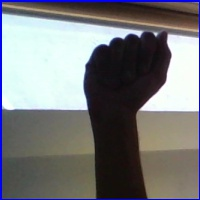

In [55]:
results = model.predict("/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/*.jpg")
results[0].show()


0: 640x640 (no detections), 5.0ms
1: 640x640 1 B, 5.0ms
2: 640x640 1 L, 5.0ms
3: 640x640 1 R, 5.0ms
4: 640x640 1 O, 5.0ms
5: 640x640 (no detections), 5.0ms
6: 640x640 (no detections), 5.0ms
7: 640x640 (no detections), 5.0ms
8: 640x640 1 Q, 5.0ms
9: 640x640 1 Y, 5.0ms
Speed: 2.7ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


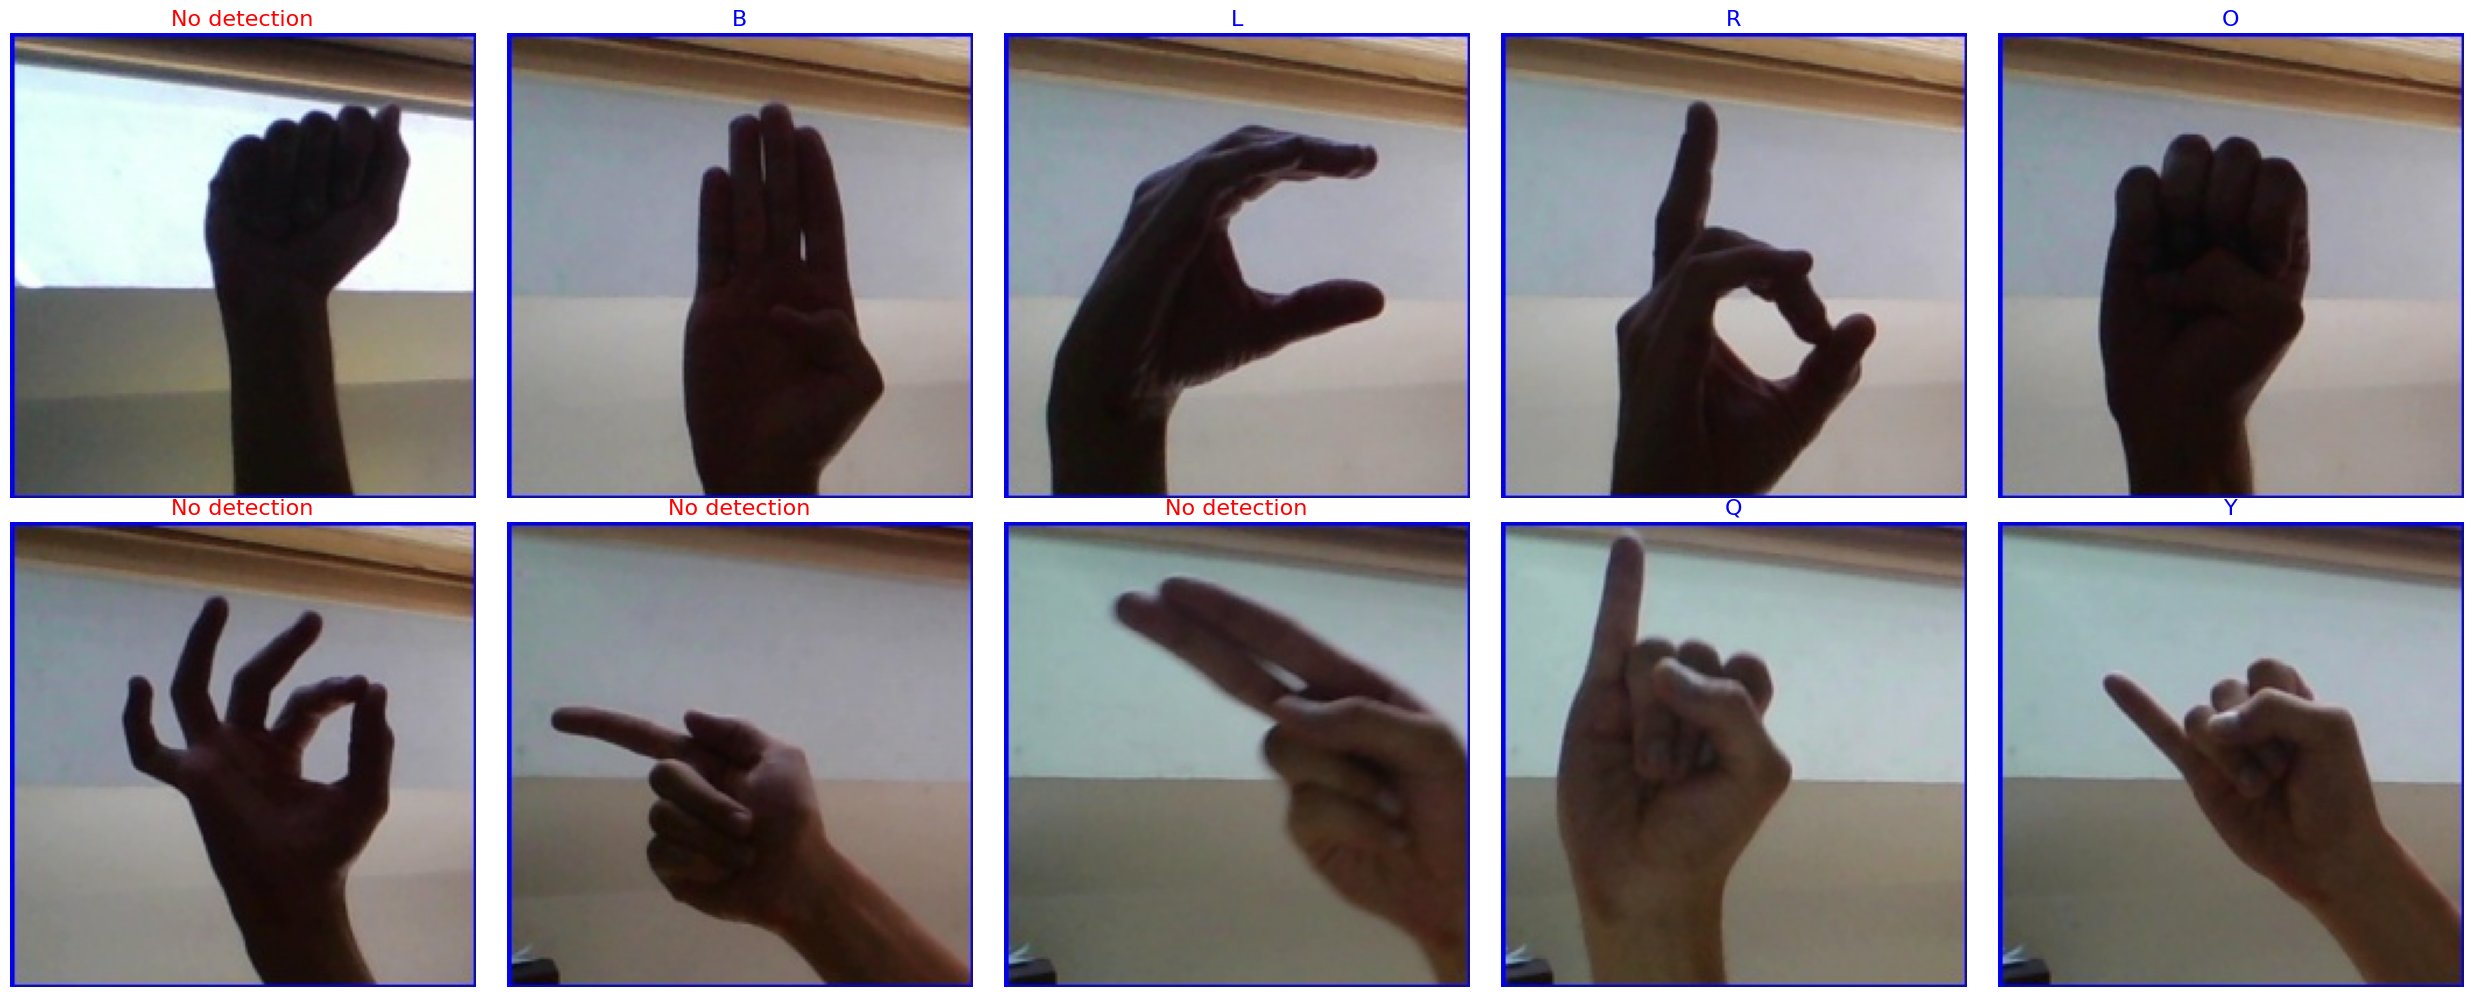

In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# 1. Get list of image paths
test_samples = sorted(glob('/content/drive/MyDrive/yolov8_detection/ASL_Dataset3/Test/*.jpg'))
test_samples = test_samples[:10]

results = model(test_samples)
class_names = model.names  # e.g., {0: 'A', 1: 'B', ...}

# 4. Show predictions with image
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

for i, result in enumerate(results):
    img_path = test_samples[i]
    img = plt.imread(img_path)

    # predicted class
    pred_classes = result.boxes.cls.cpu().numpy().astype(int) if result.boxes is not None else []
    labels = [class_names[c] for c in pred_classes]

    # Show image
    axs[i//5, i%5].imshow(img)
    axs[i//5, i%5].axis('off')

    #title with label
    if labels:
        axs[i//5, i%5].set_title(", ".join(labels), fontsize=16, color='blue')
    else:
        axs[i//5, i%5].set_title("No detection", fontsize=16, color='red')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
from ultralytics import YOLO

# Load the model
# model = YOLO(best_model_path)

# Open the camera
cap = cv2.VideoCapture(0)

# Setting width and height of the video
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)


while cap.isOpened():

    success, frame = cap.read()

    if success:

        results = model.track(frame, persist=True)


        annotated_frame = results[0].plot()

        cv2.imshow("ASL Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if
        break

cap.release()
cv2.destroyAllWindows()